<a href="https://colab.research.google.com/github/mvoassis/CIC-DDoS2019-DeepLearning/blob/main/notebooks/EDA_Fintech_Default_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extensive Data Analysis (EDA) - Fintech Default Detection
Marcos Oliveira (mvoassis@gmail.com)

## Features: 

* 'person_age' -> Quantitative
* 'person_income' -> Quantitative (Salário anual da pessoa solicitante
)
* 'person_home_ownership' -> CATEGORICAL - (Alugada (Rent), Própria (Own), Hipotecada (Mortgage) e Outros casos (Other))
* 'person_emp_length' -> Quantitative (Tempo - em anos - que a pessoa trabalhou)
* 'loan_intent' -> CATEGORICAL - Pessoal (Personal), Educativo (Education), Médico (Medical), Empreendimento (Venture), Melhora do lar (Homeimprovement), Pagamento de débitos (Debtconsolidation)
* 'loan_grade' -> CATEGORICAL - Pontuação de empréstimos, por nível variando de A a G
* 'loan_amnt' -> Quantitative (Valor total do empréstimo solicitado)
* 'loan_int_rate' -> Quantitative (Taxa de juros)
* 'loan_status' -> CATEGORICAL - TARGET - Payment Default 
* 'loan_percent_income' -> Quantitative - Renda percentual entre o valor total do empréstimo e o salário anual
* 'cb_person_default_on_file' -> CATEGORICAL/BINARY - - (Y,YES) e não (N,NO)
* 'cb_person_cred_hist_length' -> Quantitative - Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito


> **Target feature:** loan_status

## Data Importing and initial descriptive analysis


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
data  = pd.read_csv('https://github.com/mvoassis/default_forecasting_fintech/blob/main/dados_unificados.csv?raw=true')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37.0,51000.0,Mortgage,3.0,Debtconsolidation,C,12800.0,12.84,0.0,0.25,N,12
1,33.0,58000.0,Rent,5.0,Medical,A,6400.0,7.51,0.0,0.11,N,8
2,24.0,9600.0,Rent,3.0,Education,C,1300.0,12.73,1.0,0.14,N,2
3,33.0,14400.0,Own,0.0,Venture,C,2000.0,14.79,0.0,0.14,N,8
4,24.0,24468.0,Own,NaN,Homeimprovement,B,5000.0,10.75,0.0,0.20,N,3


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  34165 non-null  float64
 1   person_income               34150 non-null  float64
 2   person_home_ownership       34154 non-null  object 
 3   person_emp_length           33231 non-null  float64
 4   loan_intent                 34174 non-null  object 
 5   loan_grade                  34176 non-null  object 
 6   loan_amnt                   34424 non-null  float64
 7   loan_int_rate               30859 non-null  float64
 8   loan_status                 34142 non-null  float64
 9   loan_percent_income         34429 non-null  float64
 10  cb_person_default_on_file   34119 non-null  object 
 11  cb_person_cred_hist_length  34485 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ MB


In [89]:
# Quantitative features:

num_features = ['person_age', 'person_income', 
       'person_emp_length',  'loan_amnt',
       'loan_int_rate',  'loan_percent_income',
        'cb_person_cred_hist_length']

# Categorical Features:

cat_features = ['person_home_ownership', 'loan_intent', 'loan_grade',
                'loan_status','cb_person_default_on_file']

In [90]:
data[num_features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,34165.000000,3.415000e+04,33231.000000,34424.000000,30859.000000,34429.000000,34485.000000
mean,27.730806,6.602318e+04,4.788089,9592.552551,11.012929,0.170456,5.808583
std,6.346158,6.141127e+04,4.138156,6363.203800,3.240293,0.107654,4.063816
min,20.000000,4.000000e+03,0.000000,432.000000,5.420000,0.000000,2.000000
25%,23.000000,3.849600e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.910000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,99360.000000,23.220000,1.418919,30.000000


## Checking for NULL values within the columns

1. Check the amount of null values of each feature
2. Check each quant feature's distribution
3. Check if it is possible to fill null values
4. Drop lines with null information when it is not possible to fill.

---

> Step 1: Check the amount of null values of each feature

In [91]:
data.isna().sum()

person_age                     320
person_income                  335
person_home_ownership          331
person_emp_length             1254
loan_intent                    311
loan_grade                     309
loan_amnt                       61
loan_int_rate                 3626
loan_status                    343
loan_percent_income             56
cb_person_default_on_file      366
cb_person_cred_hist_length       0
dtype: int64

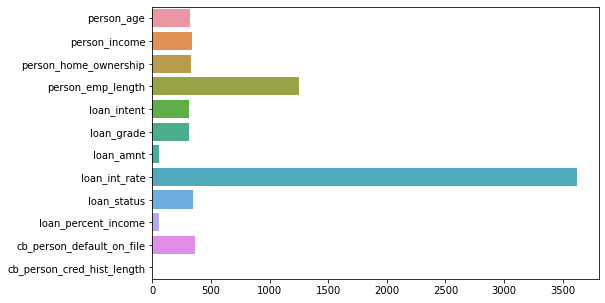

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(y=data.columns, x= data.isna().sum().values)
plt.show()

---

> Step 2: Check each feature's distribution

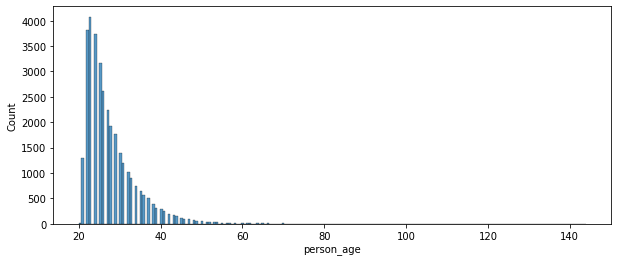

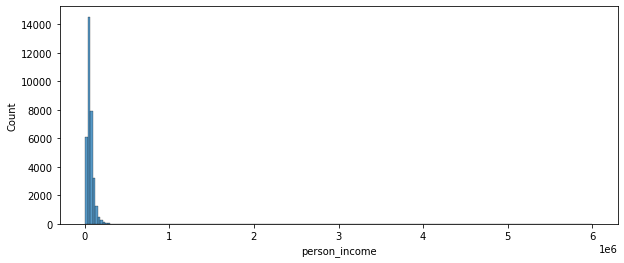

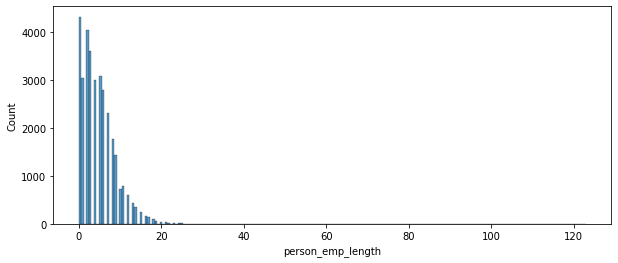

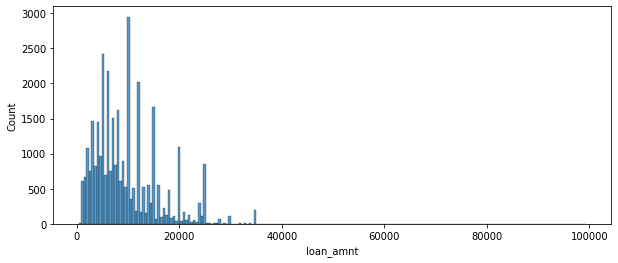

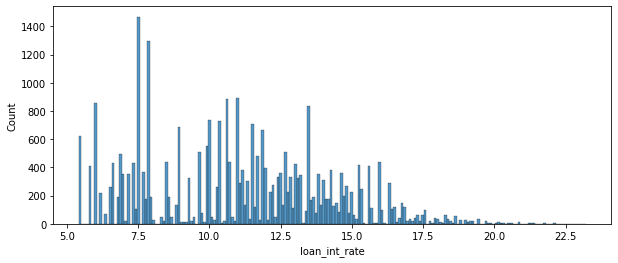

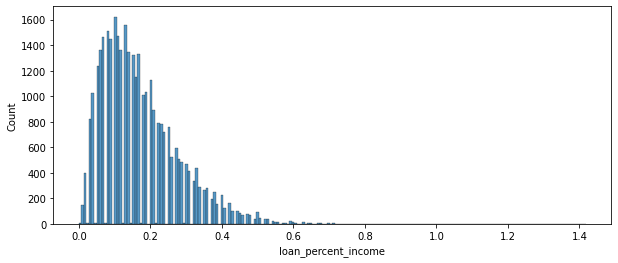

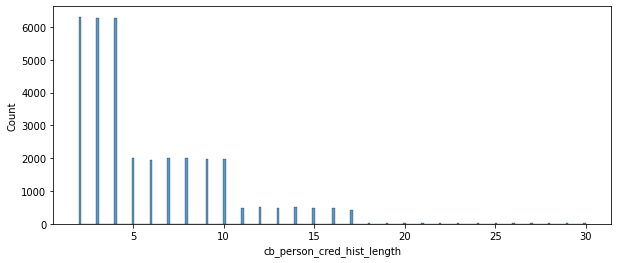

In [93]:
for name in num_features:
    plt.figure(figsize=(10,4))
    sns.histplot(data=data, x=name, bins=200)
    plt.show()
    

---

> Step 3: Check if it is possible to fill null values

In some features, such as person_age and person_income, null values could be filled with the median value since they appers to follow a more defined distribution.

However, in this first approach, I choose to drop all null values since, in my opinion, this fills could bias the classification model. 

---

> Step 4: Drop lines with null information when it is not possible to fill.

* Numbers of Rows: 34484
* Number of rows with NULL values: 5826
* Clean Rows: 28658

In [94]:
data.dropna(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28658 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28658 non-null  float64
 1   person_income               28658 non-null  float64
 2   person_home_ownership       28658 non-null  object 
 3   person_emp_length           28658 non-null  float64
 4   loan_intent                 28658 non-null  object 
 5   loan_grade                  28658 non-null  object 
 6   loan_amnt                   28658 non-null  float64
 7   loan_int_rate               28658 non-null  float64
 8   loan_status                 28658 non-null  float64
 9   loan_percent_income         28658 non-null  float64
 10  cb_person_default_on_file   28658 non-null  object 
 11  cb_person_cred_hist_length  28658 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 2.8+ MB


## Checking Target Column

The dataset is unballanced, as can be seen:

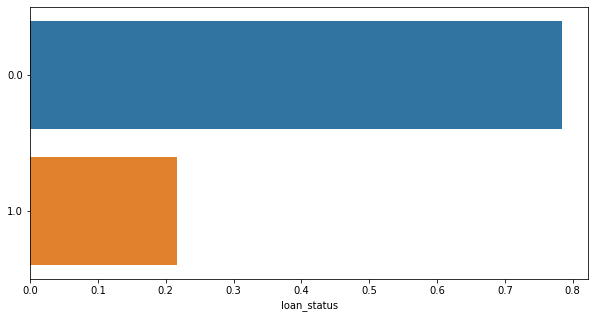

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(y=data.loan_status.unique(), x= data.loan_status.value_counts(normalize=True), orient='h')
plt.show()

In [149]:
data.loan_status.value_counts(normalize=False)

0.0    22452
1.0     6206
Name: loan_status, dtype: int64

## Checking for data Outliers

1. Boxplot of quantitative features
2. Individual Analysis
3. Plot boxplot again for comparison

---

> Step 1: Boxplot of quantitative features

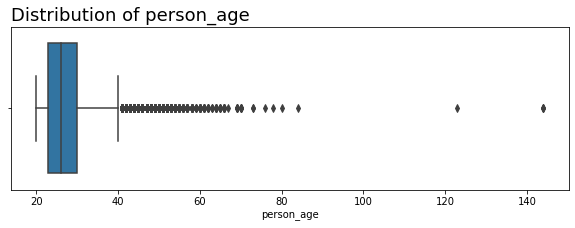

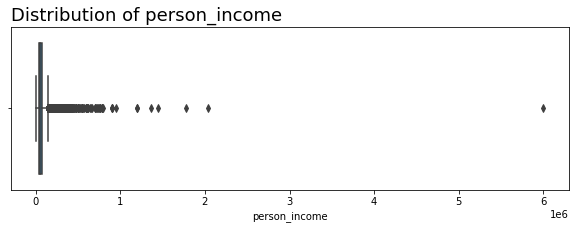

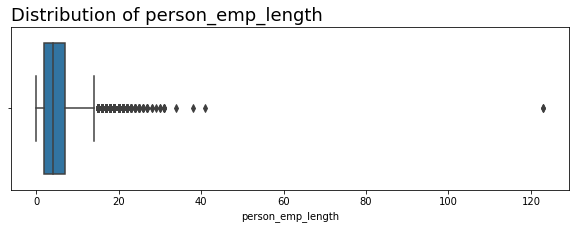

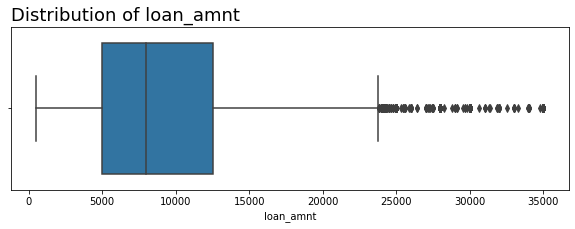

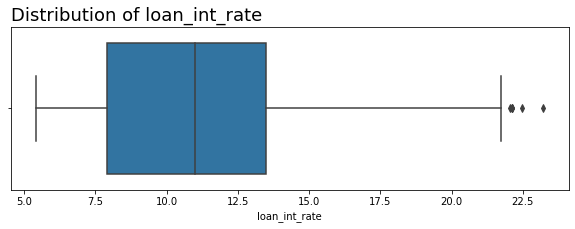

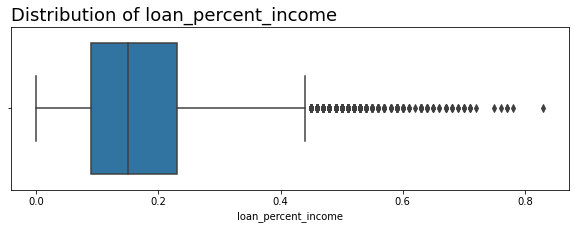

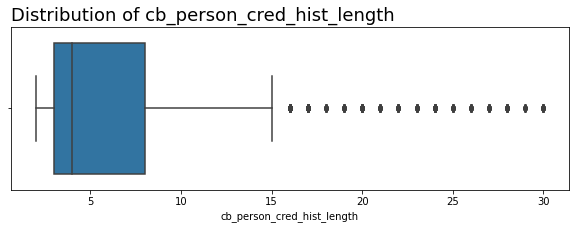

In [97]:
for name in num_features:
    plt.figure(figsize=(10,3))
    plt.title('Distribution of '+ name, loc='left', fontsize=18)
    sns.boxplot(data=data, x=name)
    plt.show()
    

> Step 2: Individual Analysis

**person_age:** 

* Ages higher than 105 should be wrong.

**person_income:**

* Check people with income higher than 2000000

**person_emp_length**

* This values shouldn't be higher than person_age
* Check people with person_emp_length >35 and <42



In [98]:
# Correcting person_age:

data2 = data.query('person_age < 105').copy() # Dropping 4 rows


In [99]:
# Correcting person_emp_length:

data2 = data2.query('person_emp_length < person_age') # Dropping 2 rows

In [100]:
# these seems legit..

data2.query('person_emp_length > 35 and person_emp_length < 42')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10189,78.0,48000.0,Rent,41.0,Medical,A,3000.0,7.51,0.0,0.06,N,25
23823,53.0,106000.0,Mortgage,38.0,Personal,B,20000.0,9.88,0.0,0.19,N,23


In [101]:
# Correcting person_emp_length:

data2 = data2.query('person_income <= 1000000')

> Step 3: Plot boxplot again for comparison

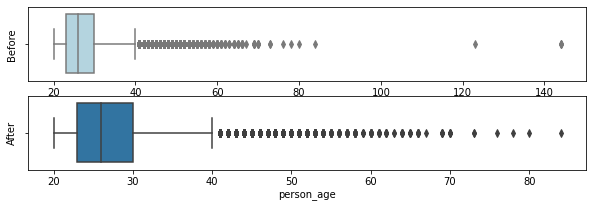

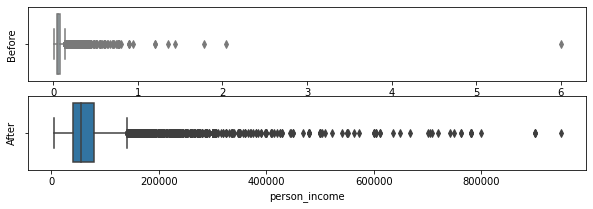

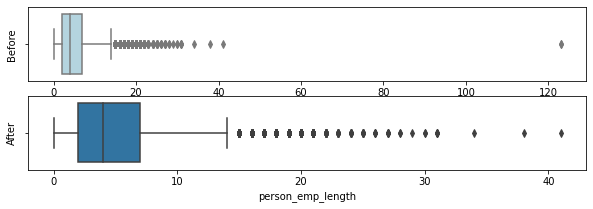

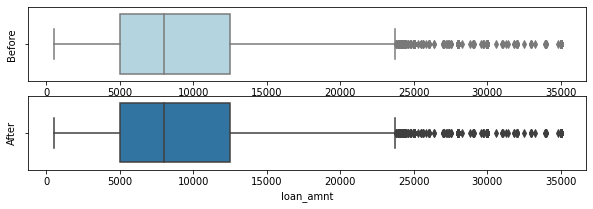

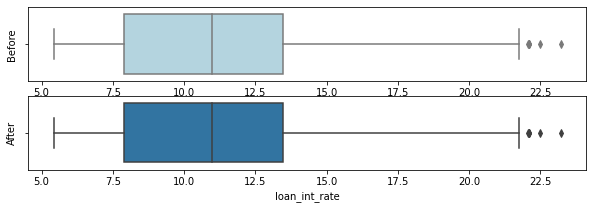

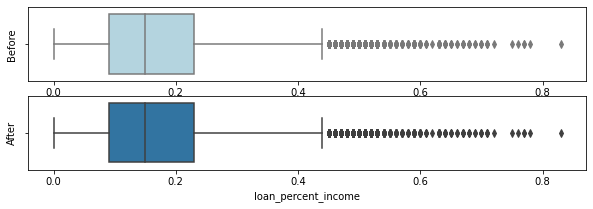

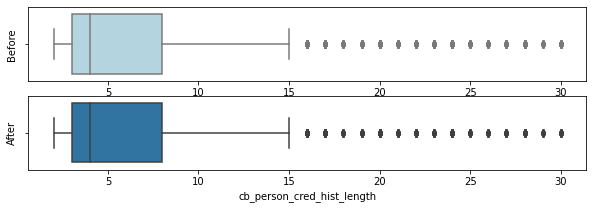

In [102]:
for name in num_features:
    plt.figure(figsize=(10,3))
    plt.title('Distribution of '+ name, loc='left', fontsize=18)
    plt.subplot(2,1,1)
    sns.boxplot(data=data, x=name, color='lightblue')
    plt.ylabel('Before')
    plt.subplot(2,1,2)
    sns.boxplot(data=data2, x=name)
    plt.ylabel('After')
    plt.show()
    

## Treatment of Categorical data

Applying one-hot encoding on the categorical data.

In [108]:
cat_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'loan_status',
 'cb_person_default_on_file']

In [ ]:
# preparing...

from sklearn.preprocessing import OneHotEncoder

data3 = data2.copy()

### person_home_ownership

In [111]:
data3['person_home_ownership'].value_counts()

Rent        14558
Mortgage    11801
Own          2193
Other          94
Name: person_home_ownership, dtype: int64

In [112]:
enc = OneHotEncoder()

ohe = enc.fit_transform(data3[['person_home_ownership']])

data3[enc.categories_[0]] = ohe.toarray()
data3.drop(['person_home_ownership'], axis=1, inplace=True)
data3.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Mortgage,Other,Own,Rent
0,37.0,51000.0,3.0,Debtconsolidation,C,12800.0,12.84,0.0,0.25,N,12,1.0,0.0,0.0,0.0
1,33.0,58000.0,5.0,Medical,A,6400.0,7.51,0.0,0.11,N,8,0.0,0.0,0.0,1.0
2,24.0,9600.0,3.0,Education,C,1300.0,12.73,1.0,0.14,N,2,0.0,0.0,0.0,1.0
3,33.0,14400.0,0.0,Venture,C,2000.0,14.79,0.0,0.14,N,8,0.0,0.0,1.0,0.0
5,24.0,78000.0,0.0,Debtconsolidation,D,19500.0,15.31,1.0,0.25,N,4,1.0,0.0,0.0,0.0


### loan_intent

In [113]:
data3['loan_intent'].value_counts()

Education            5704
Medical              5295
Venture              5000
Personal             4876
Debtconsolidation    4571
Homeimprovement      3200
Name: loan_intent, dtype: int64

In [114]:
enc = OneHotEncoder()

ohe = enc.fit_transform(data3[['loan_intent']])

data3[enc.categories_[0]] = ohe.toarray()
data3.drop(['loan_intent'], axis=1, inplace=True)
data3.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Mortgage,Other,Own,Rent,Debtconsolidation,Education,Homeimprovement,Medical,Personal,Venture
0,37.0,51000.0,3.0,C,12800.0,12.84,0.0,0.25,N,12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,33.0,58000.0,5.0,A,6400.0,7.51,0.0,0.11,N,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24.0,9600.0,3.0,C,1300.0,12.73,1.0,0.14,N,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33.0,14400.0,0.0,C,2000.0,14.79,0.0,0.14,N,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,24.0,78000.0,0.0,D,19500.0,15.31,1.0,0.25,N,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### loan_grade

In [115]:
data3['loan_grade'].value_counts()

A    9405
B    9155
C    5698
D    3249
E     871
F     209
G      59
Name: loan_grade, dtype: int64

In [116]:
enc = OneHotEncoder()

ohe = enc.fit_transform(data3[['loan_grade']])

data3[enc.categories_[0]] = ohe.toarray()
data3.drop(['loan_grade'], axis=1, inplace=True)
data3.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Mortgage,...,Medical,Personal,Venture,A,B,C,D,E,F,G
0,37.0,51000.0,3.0,12800.0,12.84,0.0,0.25,N,12,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,33.0,58000.0,5.0,6400.0,7.51,0.0,0.11,N,8,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24.0,9600.0,3.0,1300.0,12.73,1.0,0.14,N,2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33.0,14400.0,0.0,2000.0,14.79,0.0,0.14,N,8,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,24.0,78000.0,0.0,19500.0,15.31,1.0,0.25,N,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### cb_person_default_on_file

Only mapping to numbers, since it is a binary categorical feature.

In [118]:
data3['cb_person_default_on_file'].value_counts()

N    23544
Y     5102
Name: cb_person_default_on_file, dtype: int64

In [119]:
no_yes = {'N':0,
          'Y':1}

data3['cb_person_default_on_file'] = data3['cb_person_default_on_file'].map(no_yes)

data3.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Mortgage,...,Medical,Personal,Venture,A,B,C,D,E,F,G
0,37.0,51000.0,3.0,12800.0,12.84,0.0,0.25,0,12,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,33.0,58000.0,5.0,6400.0,7.51,0.0,0.11,0,8,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24.0,9600.0,3.0,1300.0,12.73,1.0,0.14,0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33.0,14400.0,0.0,2000.0,14.79,0.0,0.14,0,8,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,24.0,78000.0,0.0,19500.0,15.31,1.0,0.25,0,4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [120]:
data3['loan_status'].value_counts()

0.0    22441
1.0     6205
Name: loan_status, dtype: int64

## Correlation Analysis

1. Evaluate correlation between features and target 
2. Evaluate correlation between dependent variables


In [122]:
correlation_matrix = data3.corr()
correlation_matrix['loan_status']

person_age                   -0.022124
person_income                -0.180002
person_emp_length            -0.086536
loan_amnt                     0.113551
loan_int_rate                 0.339343
loan_status                   1.000000
loan_percent_income           0.379632
cb_person_default_on_file     0.182036
cb_person_cred_hist_length   -0.015212
Mortgage                     -0.184439
Other                         0.009837
Own                          -0.104550
Rent                          0.236060
Debtconsolidation             0.070783
Education                    -0.055714
Homeimprovement               0.034394
Medical                       0.059830
Personal                     -0.021239
Venture                      -0.078375
A                            -0.204499
B                            -0.095964
C                            -0.016398
D                             0.325832
E                             0.184261
F                             0.100302
G                        

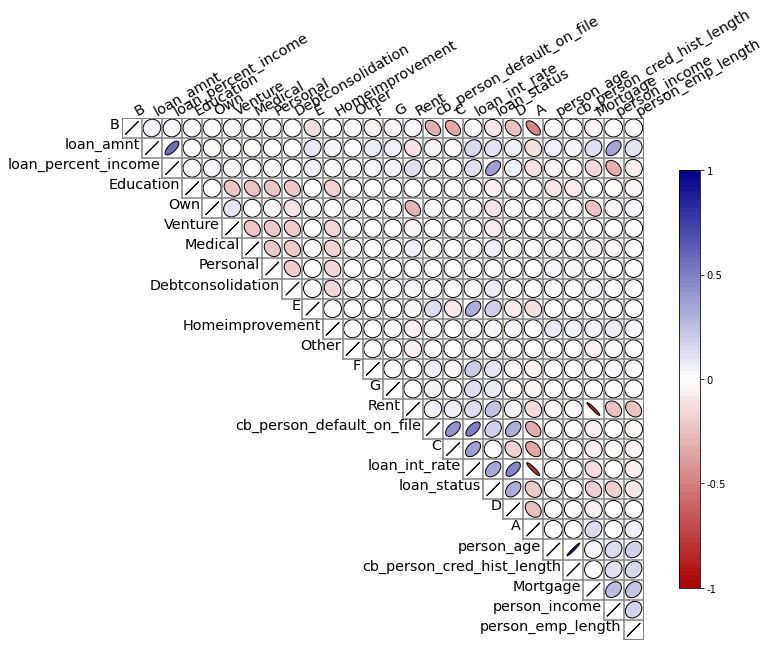

In [123]:
from biokit.viz import corrplot

# correlation_matrix = train_data.drop(['material_5', 
#                                       'material_6',
#                                       'measurement_17',
#                                       'measurement_0',
#                                       'attribute_2',
#                                       'attribute_3'],axis=1).corr()

corr_graph = corrplot.Corrplot(correlation_matrix)
corr_graph.plot(upper = 'ellipse', fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(25,15)
fig.show()

In [136]:
c = correlation_matrix[correlation_matrix!=1].abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

so[0:10]

cb_person_cred_hist_length  person_age                    0.876877
person_age                  cb_person_cred_hist_length    0.876877
Rent                        Mortgage                      0.850844
Mortgage                    Rent                          0.850844
A                           loan_int_rate                 0.799062
loan_int_rate               A                             0.799062
loan_amnt                   loan_percent_income           0.577332
loan_percent_income         loan_amnt                     0.577332
loan_int_rate               cb_person_default_on_file     0.500100
cb_person_default_on_file   loan_int_rate                 0.500100
dtype: float64

> It is recommended to drop highly correlated descriptive features.

How the choices were made?

1. Select the highly correlated features. (Above 75%)
2. Drop the one that is lesser correlated with target feature

In [138]:
data4 = data3.copy()

data4 = data4.drop('cb_person_cred_hist_length', axis=1)
data4 = data4.drop('Mortgage', axis=1)
data4 = data4.drop('A', axis=1)

In [141]:
data4.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'Other', 'Own', 'Rent',
       'Debtconsolidation', 'Education', 'Homeimprovement', 'Medical',
       'Personal', 'Venture', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

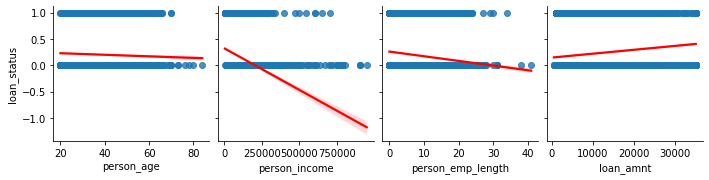

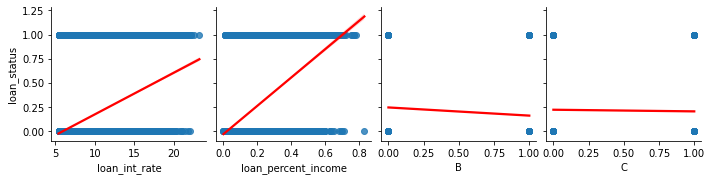

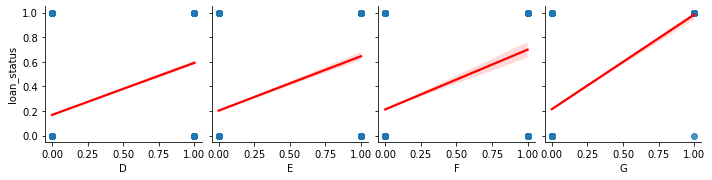

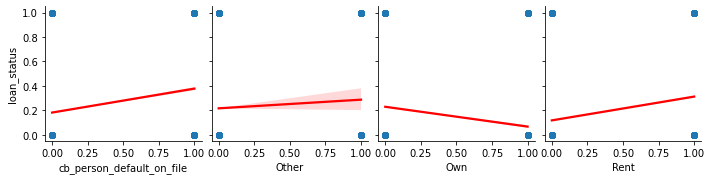

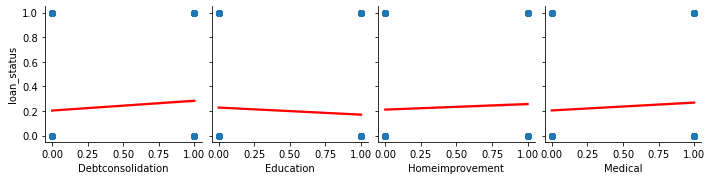

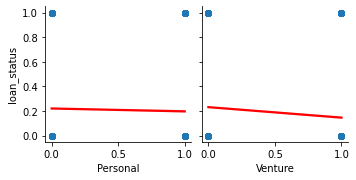

In [146]:
list_features = [['person_age','person_income','person_emp_length','loan_amnt'],
           ['loan_int_rate', 'loan_percent_income','B', 'C'],
           ['D', 'E', 'F', 'G'],
           ['cb_person_default_on_file', 'Other', 'Own', 'Rent'],
           ['Debtconsolidation', 'Education', 'Homeimprovement', 'Medical'],
           ['Personal', 'Venture']]

for features in list_features:
  ax = sns.pairplot(data4, 
             y_vars='loan_status', 
             x_vars=features,
             kind= 'reg',
             plot_kws = {'line_kws' : {'color':'red'}})



As observed, the features that most likely contribute to the value of the target "loan_status" are:

* person_income
* person_emp_length
* loan_percent_income
* loan_int_rate
* loan_amnt
* D to G
* cb_person_default_on_file
* Other
* Own
* Rent

---

Thus, two different implementations will be tested:

1. All data4 feateures;
2. Only these 13 features;

However, before saving, lets normalize data and balance the target feature.

## Saving data

1. clean_data_full.csv
2. clean_data_10f.csv


In [150]:
data4.to_csv('clean_data_full.csv', index=False)

data5 = data4[['person_income','person_emp_length','loan_percent_income',
               'loan_int_rate','loan_amnt','D','E','F','G','cb_person_default_on_file',
               'Other', 'Rent', 'Own']]

data5.to_csv('clean_data_13f.csv', index=False)
